In [1]:
import os
import numpy as np
import cv2
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
input_shape = (200, 200, 3)
batch_size = 32
epochs = 50

In [3]:
young_data_dir = 'data/utk/young'
old_data_dir = 'data/utk/old'

In [4]:
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, input_shape[:2])  # Resize to target size
            img = img / 255.0  # Normalize pixel values to the range [0, 1]
            images.append(img)
    return np.array(images)

In [5]:
young_images = load_images_from_directory(young_data_dir)
old_images = load_images_from_directory(old_data_dir)

In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False
inputs = Input(shape=input_shape, name='input_image')
encoded = base_model(inputs)
flat = Flatten()(encoded)
encoded_layer = Dense(256, activation='relu', name='encoded')(flat)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded_layer)
decoded = Reshape(input_shape)(decoded)
autoencoder = Model(inputs, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mse')

In [7]:
autoencoder.fit(
    young_images,  # Use young images for training (you can also use a generator here if needed)
    old_images,  
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/50

2/2 [==============================] - 4s 701ms/step - loss: 0.0507
Epoch 2/50
2/2 [==============================] - 3s 695ms/step - loss: 0.0496
Epoch 3/50
2/2 [==============================] - 3s 743ms/step - loss: 0.0431
Epoch 4/50
2/2 [==============================] - 3s 736ms/step - loss: 0.0357
Epoch 5/50
2/2 [==============================] - 3s 726ms/step - loss: 0.0382
Epoch 6/50
2/2 [==============================] - 3s 744ms/step - loss: 0.0358
Epoch 7/50
2/2 [==============================] - 3s 785ms/step - loss: 0.0358
Epoch 8/50
2/2 [==============================] - 3s 745ms/step - loss: 0.0366
Epoch 9/50
2/2 [==============================] - 3s 775ms/step - loss: 0.0354
Epoch 10/50
2/2 [==============================] - 3s 763ms/step - loss: 0.0347
Epoch 11/50
2/2 [==============================] - 3s 764ms/step - loss: 0.0347
Epoch 12/50
2/2 [==============================] - 3s 779ms/step - loss: 0.0337
Epoch 13/50
2/2 [==============================]

In [8]:
autoencoder.save('face_aging_autoencoder.h5')

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
loaded_autoencoder = load_model('face_aging_autoencoder.h5')

In [10]:
test_image_path = "data/utk/young/18_0_0_20170110232624418.jpg.chip.jpg"
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, input_shape[:2])  # Resize to target size
test_image = test_image / 255.0  # Normalize pixel values to the range [0, 1]
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
# Apply the autoencoder to the test image

aged_image = loaded_autoencoder.predict(test_image)

1/1 [==============================] - 0s 250ms/step


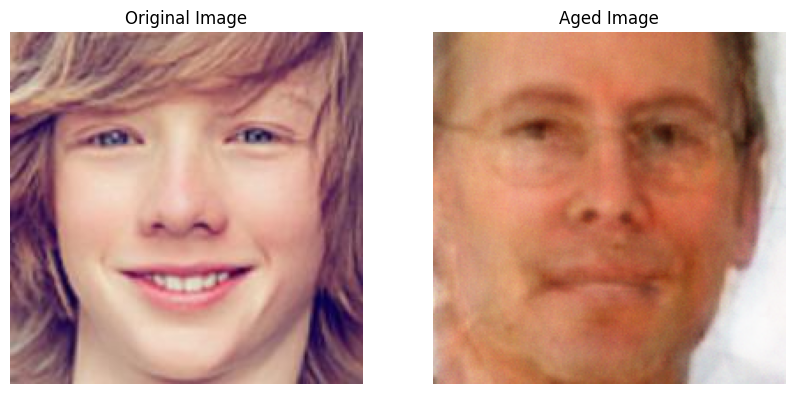

In [11]:
aged_image = (aged_image * 255).astype(np.uint8)
# Display the original and aged images side by side in a Jupyter Notebook

plt.figure(figsize=(10, 5))
# Original image

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
# Aged image

aged_image_rgb = cv2.cvtColor(aged_image[0], cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(aged_image_rgb)
plt.title('Aged Image')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 122ms/step


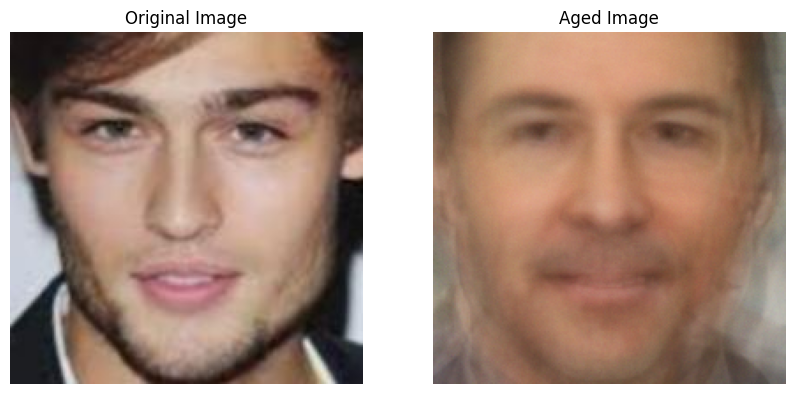

In [14]:
test_image_path = 'data/test/22_0_0_20170117143240036.jpg.chip.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, input_shape[:2])  # Resize to target size
test_image = test_image / 255.0  # Normalize pixel values to the range [0, 1]
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
# Apply the autoencoder to the test image

aged_image = loaded_autoencoder.predict(test_image)
# Rescale pixel values back to [0, 255]

aged_image = (aged_image * 255).astype(np.uint8)
# Display the original and aged images side by side in a Jupyter Notebook

plt.figure(figsize=(10, 5))
# Original image

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
# Aged image

aged_image_rgb = cv2.cvtColor(aged_image[0], cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(aged_image_rgb)
plt.title('Aged Image')
plt.axis('off')
plt.show()